In [1]:
#other Libs
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin,BaseEstimator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Pc Components Price

Have you in doubt about: "_what pc config could i use_"? or even "_what upgrades should be done in my pc?_".
In this analyst,we will show you an overview about Pc Components.
We will use datasets from each component to view his **prices relations** and use statistics to classifier all them in **filters**.with these filters,you will be able to use the **machine learning model**.
For the end we will create a **machine learning Model** that helps you in select Pc Configs based on your preferences.

### Data View
>Here, we will use Pandas,Matplotlib and Numpy for get a Overview about each component.

In [4]:
#checking data:

cpu_price=pd.read_csv("C:\\Users\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\\CPU.csv",encoding="utf-8")
gpu_price=pd.read_csv("C:\\Users\\augusto\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\\GPU.csv")
motherboard_price=pd.read_csv('C:\\Users\augusto\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\MotherBoard.csv')
power_supply_price=pd.read_csv('C:\\Users\\augusto\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\PowerSupply.csv')
ram_price=pd.read_csv('C:\\Users\\augusto\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\\RAM.csv')
storage_price=pd.read_csv('C:\\Users\\augusto\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\\StorageSSD.csv')
cabinat_price=pd.read_csv('C:\\Users\\augusto\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\\cabinates.csv')

amd_class=pd.read_csv('C:\\Users\\augusto\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\\amd_cpus.csv')
intel_class=pd.read_csv('C:\\Users\\augusto\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\\intel_cpus.csv')


all_components=[cpu_price,gpu_price,motherboard_price,power_supply_price,ram_price,storage_price,cabinat_price,amd_class,intel_class]


print(all_components)

<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\P'
C:\Users\augusto\AppData\Local\Temp\ipykernel_9084\2424948892.py:5: SyntaxWarning: invalid escape sequence '\M'
  motherboard_price=pd.read_csv('C:\\Users\augusto\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\MotherBoard.csv')
C:\Users\augusto\AppData\Local\Temp\ipykernel_9084\2424948892.py:6: SyntaxWarning: invalid escape sequence '\P'
  power_supply_price=pd.read_csv('C:\\Users\\augusto\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\PowerSupply.csv')
C:\Users\augusto\AppData\Local\Temp\ipykernel_9084\2424948892.py:5: SyntaxWarning: invalid escape sequence '\M'
  motherboard_price=pd.read_csv('C:\\Users\augusto\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\MotherBoard.csv')
C:\Users\augusto\AppData\Local\Temp\ipykernel_9084\2424948892.py:6: SyntaxWarning: invalid escap

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\.vscode\\Data Sci and Ml\\Linear_Regression\\PcData\\CPU.csv'

#### Checking Integrity:
>Before view real data,we need eliminate wrong data and clean it. 

In [ ]:
for x in all_components:
    print(x.describe(),x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1440 non-null   int64 
 1   CPU         1440 non-null   object
 2   MRP         1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB
        Unnamed: 0
count  1440.000000
mean    719.500000
std     415.836506
min       0.000000
25%     359.750000
50%     719.500000
75%    1079.250000
max    1439.000000 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  600 non-null    int64 
 1   GPU         600 non-null    object
 2   MRP         600 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB
       Unnamed: 0
count  600.000000
mean   299.500000
std    173.349358
min      0.000000
25%    149.750000
50% 

##### Transform and Handle with Data
>As you seem above,price variable is not a num.so we will also create a transformer for convert it from object to num.
>We will also create a new class for each dataset.this class is **Price Range**,which consists in 5 categories of text that classify prices to High->Low

In [ ]:
#price_transfomer:

class Price_C(BaseEstimator,TransformerMixin):

    def __init__(self,column):
        self.column=column
        
    def fit(self,X,y=None):
        
        return self


    def price_mrp(self,val):
        try:
            
            if isinstance(val,str):
                price=val.replace("₹","").replace(",","").strip()
                if price.isnumeric():
                    return int(price)*0.01110
            
        except:
            #transform invalid in None
            return None

    def price_class(self):
        price_range=pd.cut(self.column,bins=[0.,1.5,2.,3.5,6.,np.inf],labels=[1,2,3,4,5])
        return price_range
        
                
    def transform(self,X):

        #price Transformer in Int
        x_new=X.copy()
        x_new[self.column]=x_new[self.column].apply(self.price_mrp)

        #class range column 
        x_new["price_range"]=pd.cut(x_new[self.column],bins=[1,2,3,4,5,np.inf]
                                    ,labels=[1,2,3,4,5])
        

        return x_new

#Pipeline for Transform data

clean_pipeline=Pipeline([
    ("convert_price",Price_C(column='MRP')),
    ])



#clean_column=ColumnTransformer([
    #("converrt_price",clean_pipeline,cpp)])

all_components2=[]

for x in all_components:
    #cpp=x['MRP']
    xz=clean_pipeline.fit_transform(x)
    all_components2.append(xz)


#### Graphs:
>**Histogram**:Price Distribuition
>**Standard deviation**,**Mean**,**Median**: Price dynamics in this dataset

In [ ]:
#Histogram: for view prices distribuition.
def hist(all_components):
    y=0
    plt.figure(figsize=(10,6))
    for x in all_components:
        y+=1
        #stats:
        x_stats={'mean':x['MRP'].mean,'std':x['MRP'].std(),'median':x['MRP'].median()}
        plt.subplot(5,3,y,)
        plt.hist(x['MRP'],color='blue',bins=20)
        plt.xlabel("prices range")
        plt.ylabel("prices range count")
        plt.title('prices')
        plt.show()


def hist_class(all_components): #count range_price classes
    plt.figure(figsize=(20,15))

    for x in all_components:
        plt.hist(x["price_range"],color='blue',bins=20,label='price_ranges')
        plt.xlabel("prices range")
        plt.ylabel("prices range count")
        plt.title(f'{x} prices')
        plt.show()
        
    
#idea: index named as pc config (num)
#idea : rank price by branch 
    
#classify by Low and Max price:
#def max_low(all_components):
    #for x in all_components

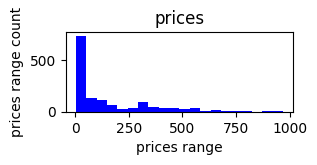

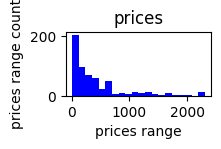

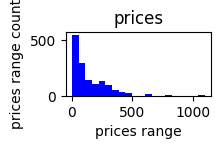

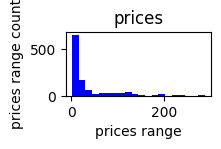

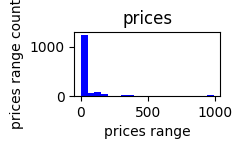

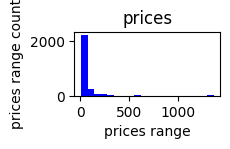

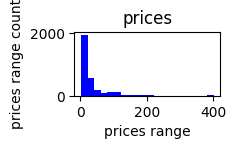

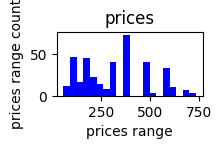

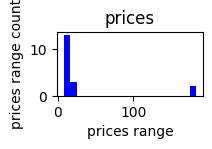

None


In [ ]:
print(hist(all_components2))

### Random Configs with **Price range** class
>Knowing the general overview of Prices,we will use data to form configs.the focus here is not right config,but the possibility of price range with diferent classes,not all.

## Machine Leaning Model
>Here,we will build a ml model that gives you a price range of you config based on preferences.